- Phân lớp với logistic regression, k-Nearest Neighbor (kNN)

### Description
Find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.


### Logistic regression

https://archive.ics.uci.edu/dataset/222/bank+marketing

In [ ]:
# !pip install chart-studio

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import matplotlib.pyplot as plt
import squarify

In [ ]:
df = pd.read_csv('C:/Users/Lenovo/OneDrive/Desktop/datascience/ML03/ML02-ThucHanh/tuan03_thuchanh/data/bank_marketing.csv')
term_deposits = df.copy(deep=True)
# Have a grasp of how our data looks.
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
# Mô tả dataframe
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### Phân tích mô tả

* To do

<Axes: ylabel='count'>

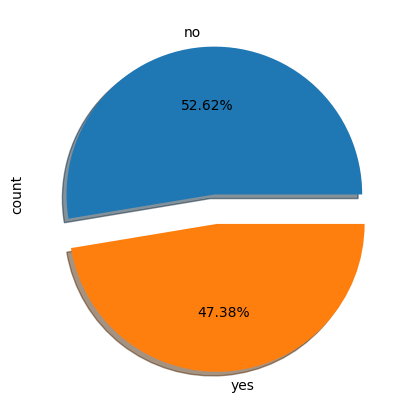

In [ ]:
# Deposit distribution
# For exploiting categorical distribution, bar/pie plot should be used
df['deposit'].value_counts().plot.pie(explode=[0, 0.2], autopct='%1.2f%%',
                                      shadow=True)

### Kiểm tra dữ liệu khuyết

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

### Chuẩn bị dữ liệu huấn luyện

In [ ]:
df['deposit'] = df['deposit'].map({'no':0, 'yes':1})

In [ ]:
df = pd.get_dummies(df)
df.shape

(11162, 52)

In [ ]:
y = df['deposit']
X = df.drop(['deposit', 'duration'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

### Huấn luyện KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)

In [ ]:
train_score = knn.score(X_train, y_train) # tính độ chính xác trên tập dữ liệu khác với regresion
train_score

0.7318848695262627

In [ ]:
test_score = knn.score(X_test, y_test)
test_score

0.5826242722794447

In [ ]:
# Với Knn, biên neighbor là quan trọng nhất, cần tìm hệ số k phù hợp

### Cải thiện mô hình
* Tìm hệ số k phù hợp
* Thay đổi số weight
* Thay đổi metrics
* Chuẩn hóa dữ liệu

In [ ]:
k_list = list(range(1, 31, 1))
train_score = []

for k in k_list:
    knn = KNeighborsClassifier()
    knn = knn.fit(X_train, y_train)
    score = knn.score(X_train, y_train)
    train_score.append(score)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k_list, train_score)
plt.show

NameError: name 'k_list' is not defined

In [ ]:
"""Kỹ thuật knn không có huấn luyện hê số như hồi quy tuyến tính, nó sẽ nhớ bộ dữ liệu,
    nên khi huấn luyện knn ta cần bộ bộ test phụ  để tìm k tối ưu"""
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=99)

k_list = list(range(1, 31, 1))
train_score = []
valid_score = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train, y_train)

    score = knn.score(X_train, y_train)
    val_score = knn.score(X_valid, y_valid)
    train_score.append(score)
    valid_score.append(val_score)

<function matplotlib.pyplot.show(close=None, block=None)>

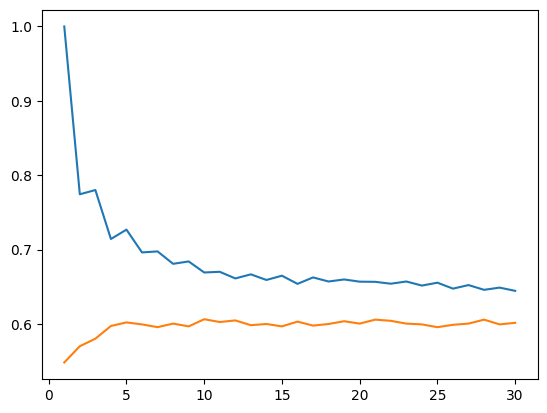

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k_list, train_score)
plt.plot(k_list, valid_score)

plt.show

In [ ]:
k_opt = np.argmax(valid_score)
k_opt

9

In [ ]:
knn = KNeighborsClassifier(n_neighbors=k_opt)
knn = knn.fit(X_train, y_train)

In [ ]:
knn.score(X_test, y_test)

0.5956112852664577